# Practica Ipython N° 1

### Primero realizaremos un análisis experimental del insertion sort, sabiendo que la complejidad del algoritmo es de Ө(n²), calcularemos los coeficientes del polinomio an²+bn+c para el mejor, el peor y el caso promedio del algoritmo

In [1]:
def insertionSort( A ):
    t = time.clock()
    for i in range( 1, len(A) ):
        key = A[i]; j = i-1
        while j >= 0 and A[j] > key:
            A[j+1] = A[j]
            j -= 1
        j += 1
        A[j] = key
    return time.clock()-t

Realizaremos pruebas sobre las distintas permutaciones en arreglos de tamaños 
n = 4, n = 5, y n = 6

In [2]:
import time
import itertools
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


mejor=[]
peor=[]
prom=[]

for n in range(4, 7):
    array = range(1, n+1)
    tiempos = [0.0, 0.0, 0.0]
    for i in xrange(0, 100):
        permutaciones = list( itertools.permutations(array) )
        tiempos[0] += insertionSort( list(permutaciones[0]) )
        t= 0.0; c = 0
        for a in permutaciones:
            t += insertionSort(list(a))
            c += 1
        tiempos[1] += t/c
        tiempos[2] += insertionSort( list( permutaciones[ len(permutaciones)-1 ] ) )


    print "Arreglo de tamano:",n
    print "Mejor:",tiempos[0]/100
    mejor.append(tiempos[0]/100)
    print "Promedio:", tiempos[1]/100
    prom.append(tiempos[1]/100)
    print "Peor:",tiempos[2]/100
    peor.append(tiempos[2]/100)
    print

Arreglo de tamano: 4
Mejor: 2.16098851255e-06
Promedio: 2.85684772025e-06
Peor: 3.40968636017e-06

Arreglo de tamano: 5
Mejor: 2.61713384501e-06
Promedio: 3.64270060084e-06
Peor: 4.83514052412e-06

Arreglo de tamano: 6
Mejor: 3.87153350929e-06
Promedio: 5.10408412891e-06
Peor: 6.68823093726e-06




Ahora tomaremos los datos obtenidos y los interpolaremos para obtener una función aproximada de la ejecución

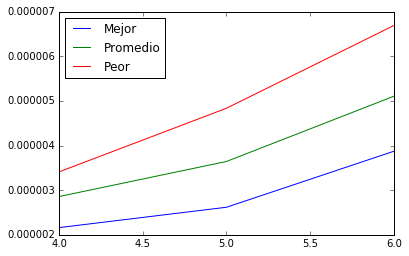

In [3]:
x = np.linspace(4,6,3,endpoint=True)

plt.plot(x,mejor,x,prom,x,peor)
plt.legend(['Mejor','Promedio','Peor'],loc='best')

Ahora utilizando un ajuste de curvas polinómico de grado 2 obtenemos los coeficientes para los polinomios de cada uno de los 3 casos y graficamos esos polinomios, podemos notar que el comportamiento del polinomio es parecido al comportamiento del experimento


Polinomio del mejor caso: 3.99127165907e-07 x² + -3.1359991607e-06 x + 8.31895050084e-06
Polinomio del caso promedio: 3.37765323743e-07 x² + -2.2540350331e-06 x + 6.46874267277e-06
Polinomio del peor caso: 2.13818124594e-07 x² + -4.98908957392e-07 x + 1.98423219624e-06


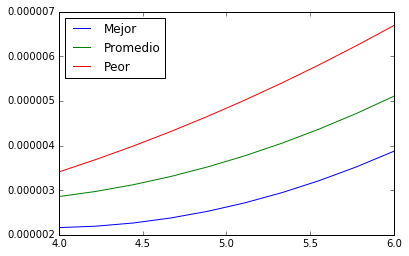

In [4]:
valoresX = np.arange( 4, 7, 1 )
m  = np.polyfit( valoresX, mejor, 2 )
pr = np.polyfit( valoresX, prom, 2 )
p  = np.polyfit( valoresX, peor, 2 )

print
print "Polinomio del mejor caso: "+str(m[0])+" x² + "+str(m[1])+ " x + "+str( m[2] )
print "Polinomio del caso promedio: "+str(pr[0])+" x² + "+str(pr[1])+ " x + "+str( pr[2] )
print "Polinomio del peor caso: "+str(p[0])+" x² + "+str(p[1])+ " x + "+str( p[2] )

x = np.linspace(4,6,3,endpoint=True)
x2 = np.linspace(4,6,10,endpoint=True)

ym  = m[0]*(x**2) + m[1]*x + m[2]
ypr = pr[0]*(x**2) + pr[1]*x + pr[2]
yp  = p[0]*(x**2) + p[1]*x + p[2]

f1 = interp1d(x,ym ,kind='quadratic')
f2 = interp1d(x,ypr,kind='quadratic')
f3 = interp1d(x,yp,kind='quadratic')

plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Promedio','Peor'],loc='best')

## Ahora realizaremos un experimento dónde combinamos insertion sort con merge sort con el fin de mejorar el comportamiento del merge sort en arreglos de pocos valores

primero necesitaremos el merge sort

In [5]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def mergeSort(A):
    tI = time.clock()
    merge_sort_main(A, 0, len(A) - 1)
    return time.clock() - tI

realizaremos ahora experimentos al Insertion Sort y al Merge Sort para ubicar una constante k dónde el Inserion Sort empieza a ser mayor en ejecución al Merge Sort, los arreglos irán desde n=4 hasta n=150, realizando 100 tests para cada tamaño y promediandolos

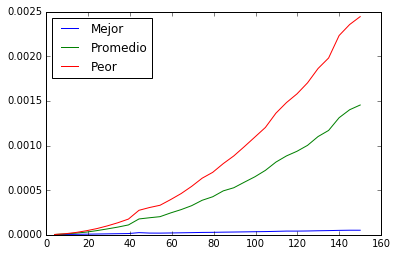

In [6]:
mejorInsertion =[]
peorInsertion  =[]
promInsertion  =[]

def tiemposInsertion(tam):
    for n in range(4, tam+1, 5):
        tests = 100
        tiempos = [0.0, 0.0, 0.0]
        for i in range(tests):
            tiempos[0] += insertionSort(range(1, n+1))
            tiempos[1] += insertionSort(list(np.random.permutation(n)))
            tiempos[2] += insertionSort(range( n, 0, -1 )) 
        mejorInsertion.append( tiempos[0]/tests )
        promInsertion.append( tiempos[1]/tests )
        peorInsertion.append( tiempos[2]/tests )
n = 150
tiemposInsertion( n )

x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,mejorInsertion,x,promInsertion,x,peorInsertion)
plt.legend(['Mejor','Promedio','Peor'],loc='best')
    

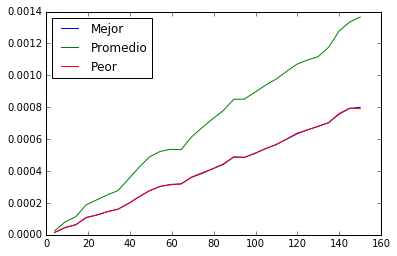

In [49]:
mejorMerge =[]
peorMerge  =[]
promMerge  =[]


def seperate( A ):
    if len(A) <= 1:
        return A
    if len(A) == 2:
        A[0],A[1] = A[1],A[0]
        return A
    i=0;j=0
    L = []; R = []
    while i < len(A):
        L.append(A[i])
        i+=2; j+=1
    i=1; j=0
    while i < len(A):
        R.append(A[i])
        i+=2; j+=1
    L = seperate(L)
    R = seperate(R)
    return L + R

def tiemposMerge(tam):
    for n in range(4, tam+1, 5):
        tests = 200
        tiempos = [0.0, 0.0, 0.0]
        for i in range(tests):
            tiempos[0] += mergeSort(range(1, n+1))
            tiempos[1] += mergeSort(list(np.random.permutation(n)))
            tiempos[2] += mergeSort(range(n, 0, -1)) #mergeSort(seperate( range(1,n+1) ) ) 
        mejorMerge.append( tiempos[0]/tests )
        promMerge.append( tiempos[1]/tests )
        peorMerge.append( tiempos[2]/tests )
n = 150
tiemposMerge( n )

x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,mejorMerge,x,promMerge,x,peorMerge)
plt.legend(['Mejor','Promedio','Peor'],loc='best')

Acá podemos ver las gráficas de los mejores casos de ambos métodos de sorting

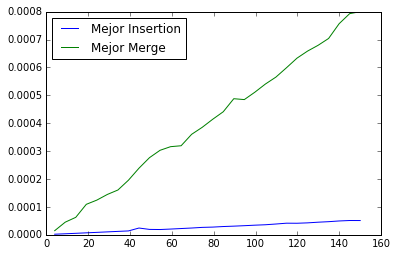

In [50]:
x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,mejorInsertion,x,mejorMerge)
plt.legend(['Mejor Insertion','Mejor Merge'],loc='best')

Las gráficas de los casos promedios de ambos métodos

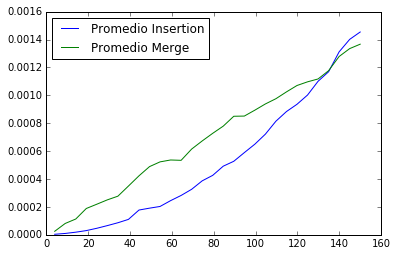

In [51]:
x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,promInsertion,x,promMerge)
plt.legend(['Promedio Insertion','Promedio Merge'],loc='best')

Y las gráficas de los peores casos de ambos métodos

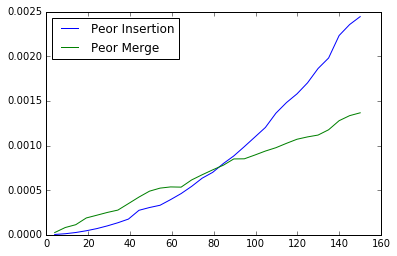

In [52]:
x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,peorInsertion,x,promMerge)
plt.legend(['Peor Insertion', 'Peor Merge'],loc='best')

Ahora para calcular nuestro valor k, empezamos a buscar los puntos de intersección entre promedios y peores resultados de los experimentos, ya que el mejor caso del insertion nunca interseca con el mejor caso del merge y no podremos encontrar el valor de k

In [54]:
i = 0
while promInsertion[i] < promMerge[i]:
    i += 1
kProm = i*5
print "Nuestro valor k para los casos promedio es cercano a:", kProm

i = 0
while peorInsertion[i] < peorMerge[i]:
    i += 1
kPeor = i * 5
print "Nuestro valor k para los peores casos es cercano a:", kPeor

Nuestro valor k para los casos promedio es cercano a: 135
Nuestro valor k para los peores casos es cercano a: 40


Ahora para crear nuestra union Merge + Insertion utilizaremos el k para los peores casos, ya que se comporta mejor que el k para los casos promedios

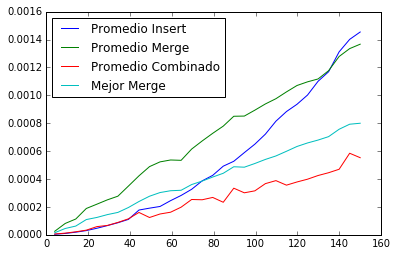

In [65]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
    return A

def merge_insert_sort_main(A, p, r):
    if r - p > kPeor:
        if p < r:
            q = int((p + r) / 2.0)
            A = merge_insert_sort_main(A, p, q)
            A = merge_insert_sort_main(A, q + 1, r)
            A = merge(A, p, q, r)
            return A
    else:
        a = A[p:r+1]
        insertionSort(a)
        A = A[0:p] + a + A[r+1:len(A)]
        return A

def mergeInsertSort(A):
    tI = time.clock()
    A = merge_insert_sort_main(A, 0, len(A) - 1)
    return time.clock()-tI

a =  list(np.random.permutation(250))

promedioInsertMerge = []

def tiemposInsertMerge(tam):
    for n in range(4, tam+1, 5):
        tests = 100
        tiempos = 0.0
        for i in range(tests):
            tiempos += mergeInsertSort(list(np.random.permutation(n)))
        promedioInsertMerge.append( tiempos/tests )
        
n = 150
tiemposInsertMerge( n )

x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,promInsertion,x,promMerge,x,promedioInsertMerge, x, mejorMerge)
plt.legend(['Promedio Insert','Promedio Merge','Promedio Combinado', 'Mejor Merge'],loc='best')

¿qué sucede si utilizamos el k para los casos promedios?

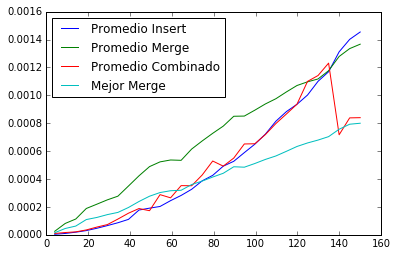

In [68]:
def merge_insert_sort_main(A, p, r):
    if r - p > kProm:
        if p < r:
            q = int((p + r) / 2.0)
            A = merge_insert_sort_main(A, p, q)
            A = merge_insert_sort_main(A, q + 1, r)
            A = merge(A, p, q, r)
            return A
    else:
        a = A[p:r+1]
        insertionSort(a)
        A = A[0:p] + a + A[r+1:len(A)]
        return A

a =  list(np.random.permutation(250))

promedioInsertMerge = []

def tiemposInsertMerge(tam):
    for n in range(4, tam+1, 5):
        tests = 100
        tiempos = 0.0
        for i in range(tests):
            tiempos += mergeInsertSort(list(np.random.permutation(n)))
        promedioInsertMerge.append( tiempos/tests )
        
n = 150
tiemposInsertMerge( n )

x = np.linspace(4,n,n/5,endpoint=True)

plt.plot(x,promInsertion,x,promMerge,x,promedioInsertMerge, x, mejorMerge)
plt.legend(['Promedio Insert','Promedio Merge','Promedio Combinado', 'Mejor Merge'],loc='best')

ahora podemos afirmar que nuestra función se comporta de forma parecida al insertion hasta el punto en el que se tocan y luego tiene el comportamiento del merge en su mejor caso, pero como podemos notar, es mejor el comportamiento con el k para los peores casos que es cercano a arreglos de tamaño 40